In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df=pd.read_csv(r"C:\Users\Dishant Rathod\Downloads\Churn_Bank_Customers_AK.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Below Tasks are EDA, Statistics, Basic Python and Visualization. 

In [4]:
df.shape

(10000, 14)

In [5]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
 df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [8]:
for col in ['Geography', 'Gender','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']:
    print(df[col].unique())


['France' 'Spain' 'Germany']
['Female' 'Male']
[1 3 2 4]
[1 0]
[1 0]
[1 0]


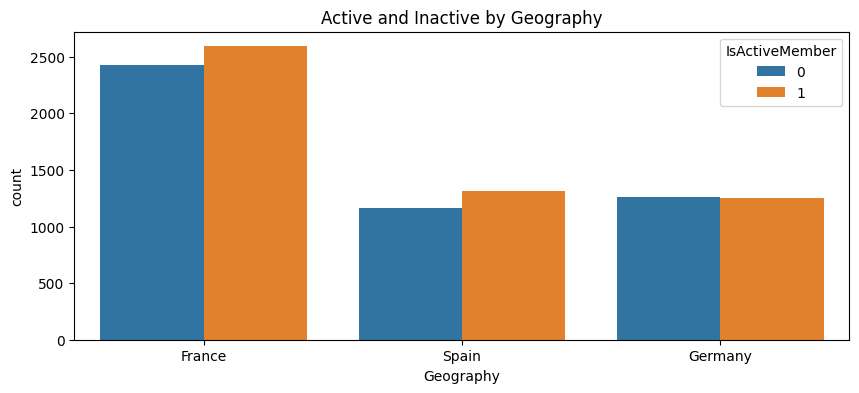

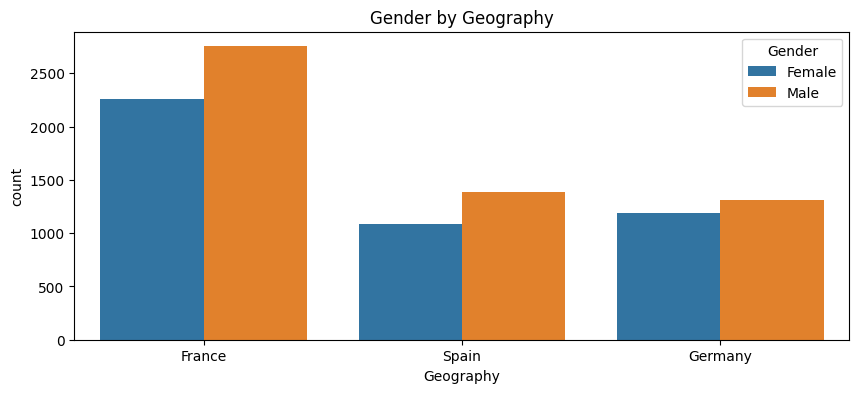

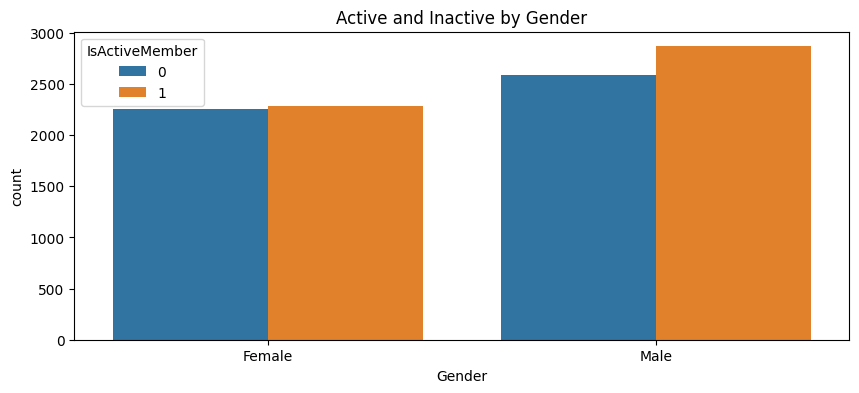

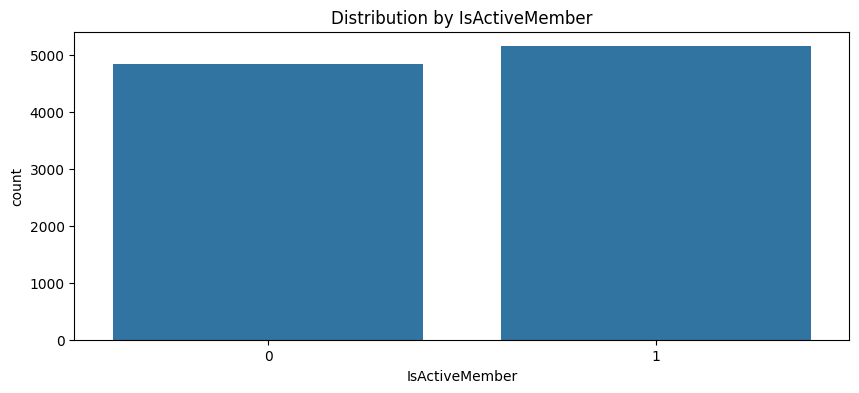

In [9]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Geography',hue='IsActiveMember')
plt.title('Active and Inactive by Geography')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Geography',hue='Gender')
plt.title('Gender by Geography')
plt.show()

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Gender',hue='IsActiveMember')
plt.title('Active and Inactive by Gender')
plt.show()

plt.figure(figsize=(10,4))
sns.countplot(data=df, x='IsActiveMember')
plt.title('Distribution by IsActiveMember')
plt.show()


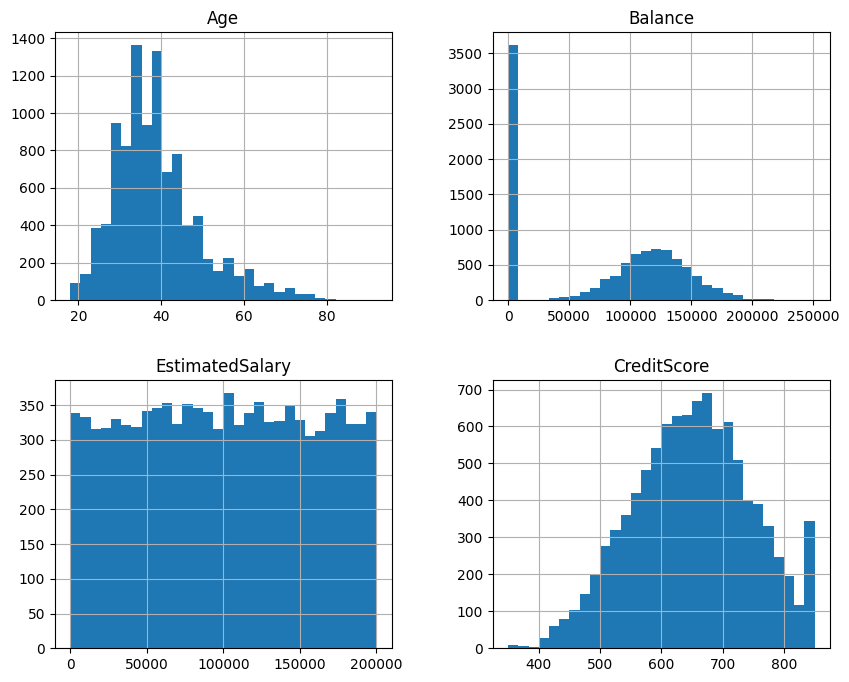

In [10]:
df[['Age', 'Balance', 'EstimatedSalary', 'CreditScore']].hist(bins=30, figsize=(10, 8))
plt.show()

In [11]:
skewed = df[['Balance', 'EstimatedSalary', 'CreditScore']].skew()
skewed


Balance           -0.141109
EstimatedSalary    0.002085
CreditScore       -0.071607
dtype: float64

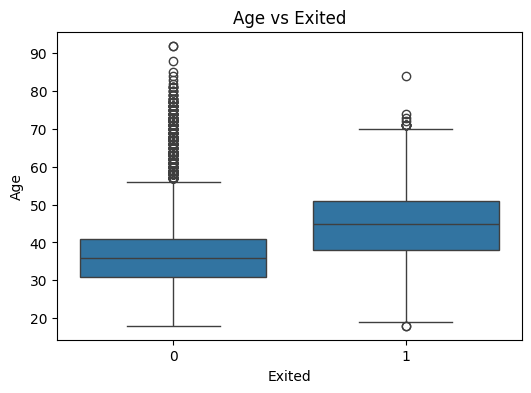

In [12]:
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Exited', y='Age')
plt.title('Age vs Exited')
plt.show()

In [13]:
a=df.groupby('Exited').mean(numeric_only=True)
a

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
Exited,,,,,,,,,,
0,5024.694964,1.569117e+07,651.853196,37.408389,5.033279,72745.296779,1.544267,0.707146,0.554565,99738.391772
1,4905.917526,1.569005e+07,645.351497,44.837997,4.932744,91108.539337,1.475209,0.699067,0.360825,101465.677531


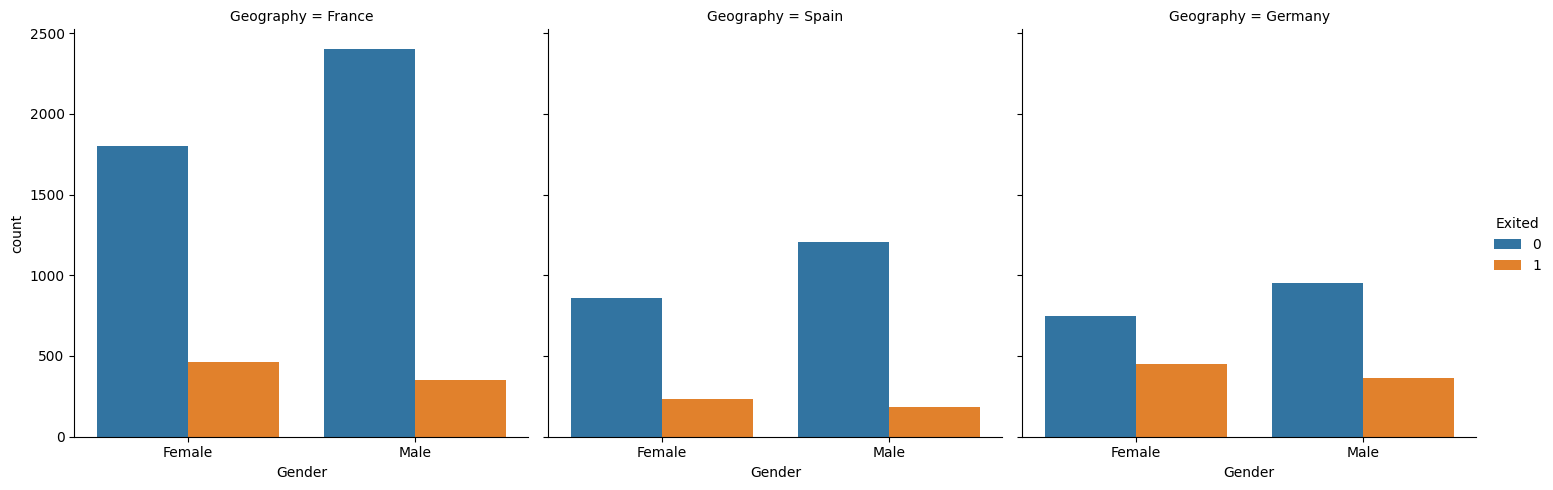

In [14]:
sns.catplot(data=df, x='Gender', hue='Exited', col='Geography', kind='count')
plt.show()


In [15]:
df_original = df.copy()  # Preserve original
df = df.copy()           # Work on a new copy for processing


Data Cleaning and Pre-processing

In [16]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)


In [17]:
df['Age_Tenure'] = df['Age'] * df['Tenure']
df['Balance_Salary_Ratio'] = df['Balance'] / (df['EstimatedSalary'] + 1e-6)
df['CreditScore_Products'] = df['CreditScore'] * df['NumOfProducts']


In [18]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Age_Tenure,Balance_Salary_Ratio,CreditScore_Products
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,False,False,False,84,0.000000,619
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False,41,0.744677,608
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False,336,1.401375,1506
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,False,False,False,39,0.000000,1398
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False,86,1.587055,850


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',
                    'Age_Tenure','Balance_Salary_Ratio', 'CreditScore_Products']

df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])


Save the scaler object to a file

In [20]:
import joblib

joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [21]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Age_Tenure,Balance_Salary_Ratio,CreditScore_Products
0,1,15634602,Hargrave,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,False,False,False,-0.866106,-0.035804,-0.916474
1,2,15647311,Hill,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,True,False,-1.202217,-0.028930,-0.943206
2,3,15619304,Onio,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,False,False,False,1.103666,-0.022868,1.239066
3,4,15701354,Boni,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,False,False,False,-1.217851,-0.035804,0.976610
4,5,15737888,Mitchell,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,True,False,-0.850472,-0.021154,-0.355110


In [22]:
df.dtypes

RowNumber                 int64
CustomerId                int64
Surname                  object
CreditScore             float64
Age                     float64
Tenure                  float64
Balance                 float64
NumOfProducts           float64
HasCrCard                 int64
IsActiveMember            int64
EstimatedSalary         float64
Exited                    int64
Geography_Germany          bool
Geography_Spain            bool
Gender_Male                bool
Age_Tenure              float64
Balance_Salary_Ratio    float64
CreditScore_Products    float64
dtype: object

In [23]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)


In [24]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male,Age_Tenure,Balance_Salary_Ratio,CreditScore_Products
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,False,False,False,-0.866106,-0.035804,-0.916474
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,0,False,True,False,-1.202217,-0.028930,-0.943206
2,-1.536794,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,False,False,False,1.103666,-0.022868,1.239066
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,False,False,False,-1.217851,-0.035804,0.976610
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,False,True,False,-0.850472,-0.021154,-0.355110


In [25]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Logistic Regression 

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

  Random Forest Classifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

def evaluate_model(y_true, y_pred, model_name):
    print(f"🔍 Evaluation for {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred))
    print("-" * 50)

# Logistic Regression
evaluate_model(y_test, y_pred_lr, "Logistic Regression")

# Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest")


🔍 Evaluation for Logistic Regression
Confusion Matrix:
[[1538   55]
 [ 331   76]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.58      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.70      0.58      0.59      2000
weighted avg       0.77      0.81      0.77      2000

ROC AUC Score: 0.5761030676284913
--------------------------------------------------
🔍 Evaluation for Random Forest
Confusion Matrix:
[[1537   56]
 [ 208  199]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1593
           1       0.78      0.49      0.60       407

    accuracy                           0.87      2000
   macro avg       0.83      0.73      0.76      2000
weighted avg       0.86      0.87      0.86      2000

ROC AUC Score: 0.7268948455389134
---------------------

Class Balance for Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 1. Train model with class weights
rf_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_balanced.fit(X_train, y_train)

# 2. Predict
y_pred_rf_bal = rf_balanced.predict(X_test)

# 3. Evaluate
def evaluate_model(y_true, y_pred, model_name):
    print(f"\n🔍 Evaluation for {model_name}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_true, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_true, y_pred))

evaluate_model(y_test, y_pred_rf_bal, "Random Forest (Balanced Class Weights)")



🔍 Evaluation for Random Forest (Balanced Class Weights)
Confusion Matrix:
[[1543   50]
 [ 227  180]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.78      0.44      0.57       407

    accuracy                           0.86      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

ROC AUC Score: 0.7054365613687646


In [31]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier

# 1. Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 2. Train Random Forest on SMOTE data
rf_smote = RandomForestClassifier(random_state=42)
rf_smote.fit(X_train_smote, y_train_smote)

# 3. Predict and Evaluate
y_pred_rf_smote = rf_smote.predict(X_test)

evaluate_model(y_test, y_pred_rf_smote, "Random Forest (SMOTE)")



🔍 Evaluation for Random Forest (SMOTE)
Confusion Matrix:
[[1425  168]
 [ 159  248]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      1593
           1       0.60      0.61      0.60       407

    accuracy                           0.84      2000
   macro avg       0.75      0.75      0.75      2000
weighted avg       0.84      0.84      0.84      2000

ROC AUC Score: 0.7519376078698113


Hyperparameter (GridsearchCV)

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Step 1: Set up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],         # Try 100 and 200 trees
    'max_depth': [4, 6, 10],            # Try different tree depths
    'min_samples_split': [2, 5],        # Try different split thresholds
    'min_samples_leaf': [1, 2]          # Try different leaf sizes
}

In [33]:
# Step 2: Create the base model
rf = RandomForestClassifier(random_state=42)


In [34]:
# Step 3: Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=rf,                  # model to tune
    param_grid=param_grid,        # dictionary of parameters to try
    cv=5,                          # 5-fold cross-validation
    scoring='f1',                  # optimize for F1 score (focuses on churn class)
    n_jobs=-1                      # use all CPU cores
)


In [35]:
# Step 4: Fit grid search on SMOTE training data
grid_search.fit(X_train_smote, y_train_smote)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [4, 6, 10], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [36]:
# Step 5: Best model
best_rf = grid_search.best_estimator_

# Predict on test set
y_pred_tuned = best_rf.predict(X_test)

# Step 6: Evaluate the tuned model
evaluate_model(y_test, y_pred_tuned, "Tuned Random Forest (SMOTE)")



🔍 Evaluation for Tuned Random Forest (SMOTE)
Confusion Matrix:
[[1368  225]
 [ 133  274]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1593
           1       0.55      0.67      0.60       407

    accuracy                           0.82      2000
   macro avg       0.73      0.77      0.74      2000
weighted avg       0.84      0.82      0.83      2000

ROC AUC Score: 0.7659878676827828


Feature Importance

C:\Users\Dishant Rathod\AppData\Local\Temp\ipykernel_16924\2028192228.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')


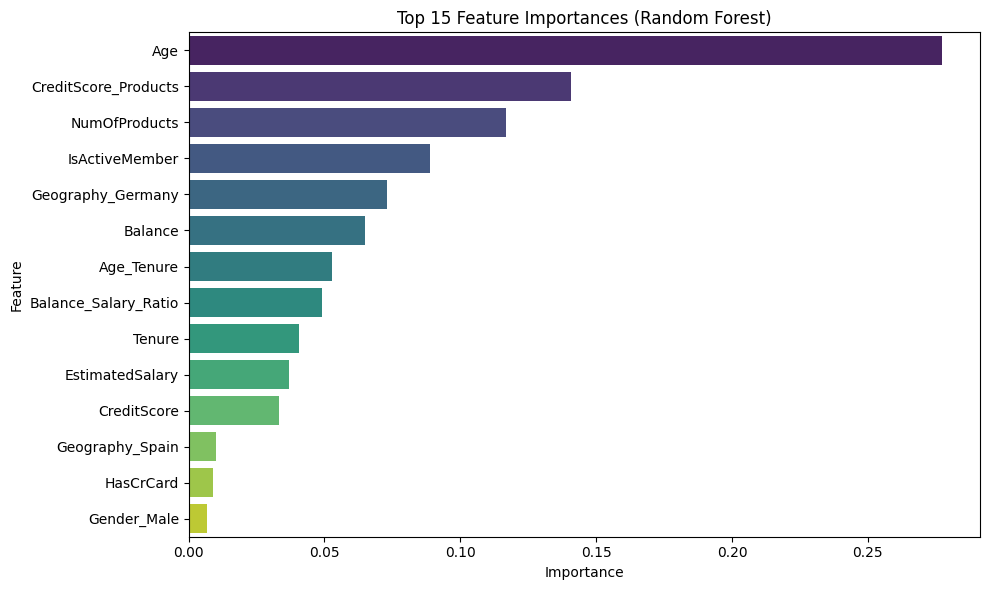

In [37]:
# 1. Get feature importances from the best RF model
importances = best_rf.feature_importances_

# 2. Match with column names
feature_names = X_train.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 3. Sort by importance
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# 4. Plot the top features
plt.figure(figsize=(10,6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()


Save Tuned Random Forest Model 

In [38]:
import joblib

# Save the model
joblib.dump(best_rf, 'tuned_random_forest_model.pkl')


['tuned_random_forest_model.pkl']

Load the Model When Needed

In [39]:
# Load the model from file
loaded_model = joblib.load('tuned_random_forest_model.pkl')


In [41]:
import joblib

# Save the actual feature column order
joblib.dump(X.columns.tolist(), "feature_columns.pkl")

# Save the model and scaler
joblib.dump(loaded_model, "tuned_random_forest_model.pkl")
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

Predict New Customer Data

In [40]:
# Load new data
new_data = pd.read_csv('new_customers.csv')

# Preprocess like before: scaling, encoding, feature engineering
# ... same steps as X_train preprocessing

# Predict
new_predictions = loaded_model.predict(new_data)

# Add predictions to dataframe
new_data['Predicted_Churn'] = new_predictions

# Save to CSV
new_data.to_csv('churn_predictions.csv', index=False)


FileNotFoundError: [Errno 2] No such file or directory: 'new_customers.csv'

Predict Manually churn Customer

In [ ]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler

# 1. Load the trained model and scaler
model = joblib.load('tuned_random_forest_model.pkl')
scaler = joblib.load('scaler.pkl')

# 2. Manually enter customer details (raw values)
raw_customer = {
    'CreditScore': 60,
    'Age':55 ,
    'Tenure': 1,
    'Balance': 150.00,
    'NumOfProducts': 1,
    'EstimatedSalary': 850.00,
    'Geography_Germany': 1,
    'Geography_Spain': 0,
    'Gender_Male': 1,
    'HasCrCard': 0,
    'IsActiveMember': 0
}

# 3. Convert to DataFrame
df = pd.DataFrame([raw_customer])

# 4. Create interaction features
df['Age_Tenure'] = df['Age'] * df['Tenure']
df['Balance_Salary_Ratio'] = df['Balance'] / (df['EstimatedSalary'] + 1e-6)
df['CreditScore_Products'] = df['CreditScore'] * df['NumOfProducts']

# 5. Reorder columns to match training
final_columns = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',
    'Age_Tenure', 'Balance_Salary_Ratio', 'CreditScore_Products',
    'Geography_Germany', 'Geography_Spain', 'Gender_Male',
    'HasCrCard', 'IsActiveMember'
]

df = df[final_columns]

# 6. Apply scaling to numeric features
columns_to_scale = [
    'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary',
    'Age_Tenure', 'Balance_Salary_Ratio', 'CreditScore_Products'
]

df[columns_to_scale] = scaler.transform(df[columns_to_scale])

# 7. Predict churn
prediction = model.predict(df)
prediction_label = 'Will Churn' if prediction[0] == 1 else 'Will Not Churn'

# 8. Show result
print("🔍 Prediction Result:", prediction_label)


🔍 Prediction Result: Will Churn


D:\Python Software\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)
